In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Kabbage Data Science Take Home Challenge - By Jingxuan SUN

The objective is to leverage the dataset to learn more about our customers. Along the notebook, we will load, observe and visualize the distribution of the transactions for different categories and account of different types, followed by an attempt for a predictive model on account types. 
<br> Please install the necessary library seaborn according to the [instruction](https://seaborn.pydata.org/installing.html).

### Load and observe data

In [2]:
ai = pd.read_csv('account_info.csv')
al = pd.read_csv('account_labels.csv')
ai.head()

,account_id,category,balance,debits,credits
0,a21sanZjcHRlbGl8f2ZoZXJ2ZWx4a3pmdmh9aHp2emttbmVi,ATM/Cash Withdrawals,-100.00,1,0
1,a21sanZjcHRlbGl8f2ZoZXJ2ZWx4a3pmdmh9aHp2emttbmVi,Checks,-39182.84,39,0
2,a21sanZjcHRlbGl8f2ZoZXJ2ZWx4a3pmdmh9aHp2emttbmVi,Gasoline/Fuel,0.00,0,0
3,a21sanZjcHRlbGl8f2ZoZXJ2ZWx4a3pmdmh9aHp2emttbmVi,Groceries,0.00,0,0
4,a21sanZjcHRlbGl8f2ZoZXJ2ZWx4a3pmdmh9aHp2emttbmVi,Mortgages,0.00,0,0


In [3]:
ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
account_id    10000 non-null object
category      10000 non-null object
balance       10000 non-null float64
debits        10000 non-null int64
credits       10000 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 390.7+ KB


In [4]:
ai.describe()

,balance,debits,credits
count,1.000000e+04,10000.000000,10000.000000
mean,-8.719464e+03,39.819000,8.653600
std,7.157605e+04,117.505892,47.378431
min,-1.911872e+06,0.000000,0.000000
25%,-6.204625e+02,0.000000,0.000000
50%,0.000000e+00,0.000000,0.000000
75%,0.000000e+00,16.000000,0.000000
max,6.771089e+05,1678.000000,2623.000000


In [5]:
ai['category'].value_counts()

Taxes                   1000
Groceries               1000
Gasoline/Fuel           1000
Restaurants/Dining      1000
Mortgages               1000
Overall                 1000
Wages Paid              1000
Sales                   1000
Checks                  1000
ATM/Cash Withdrawals    1000
Name: category, dtype: int64

In [10]:
ai['account_id'].nunique()

1000

For the account_info dataset, there are 10000 records each with 5 variables. There's no null or illegal values. There are in total 10 categories of transactions, balanced in number; and 1000 unique account ids. 

In [6]:
al.head()

,account_id,label
0,anl7fnp2cHVlentxfWZoYW93ZWxncW5mZnZtZXpobmpxbnV1,1
1,aHxwaW10fmhldn1xamZoam5zZWxwcXtmZHV-anx2bnBpbXl2,1
2,em1ycHZyfWZlaHtpfGZoaX5mZW18a2tmZ3ZpZXFlbnF7cGdm,0
3,en5pb2d2cXVlZ3t9e2ZoYXt0ZXV9bHFmaGZ8YmltbGt8b2Vq,0
4,cHp8amh0amJldmloe2ZocntkZWx9cH5maXJsYmhlenFqb2xy,1


In [7]:
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
account_id    1000 non-null object
label         1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [8]:
al.describe()

,label
count,1000.000000
mean,0.148000
std,0.355278
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
al['account_id'].nunique()

1000

For account_label dataset, there are in total 1000 records with 2 attributes. There's no null and illegal values, and each row represents a unique account id, corresponding to those in account_info dataset.

### Visualize distributions of customer

In [17]:
num_transac = ai.groupby('category').sum()
num_transac.columns = ['tot_balance', 'num_debits', 'num_credits']
num_transac

,tot_balance,num_debits,num_credits
category,,,
ATM/Cash Withdrawals,-9288417.70,11833,748
Checks,-95772960.13,71154,171
Gasoline/Fuel,-565618.21,9460,108
Groceries,-458916.21,8782,449
Mortgages,-509498.31,349,15
Overall,27224421.37,277780,82950
Restaurants/Dining,593834.96,14923,1633
Sales,-165378.12,70,79
Taxes,-8200507.98,3802,381


Text(0.5,1,'Number of Outgoing Transaction Distribution')

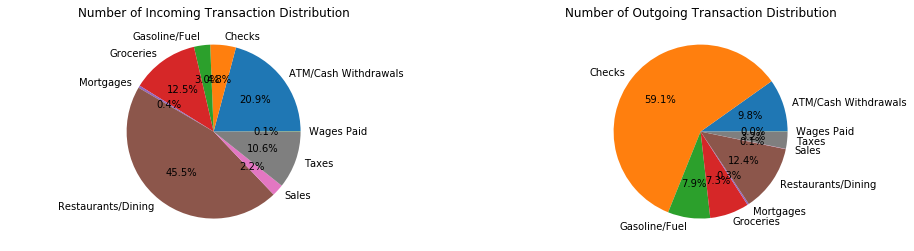

In [35]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,4))
sizes1 = num_transac.drop('Overall')['num_credits'].values.tolist()
sizes2 = num_transac.drop('Overall')['num_debits'].values.tolist()
labels = num_transac.drop('Overall').index.values.tolist()
ax1.axis('equal')
ax1.pie(sizes1, labels=labels, autopct='%1.1f%%')
ax1.set_title('Number of Incoming Transaction Distribution')
ax2.axis('equal')
ax2.pie(sizes2, labels=labels, autopct='%1.1f%%')
ax2.set_title('Number of Outgoing Transaction Distribution')

Having a look at all the transactions, we can see from the number of transactions' perspective, our customer receive money most frequently from restourants/dinning and spend most frequently by checks. Except from ATM and check, people spend most on restaurants/dining.

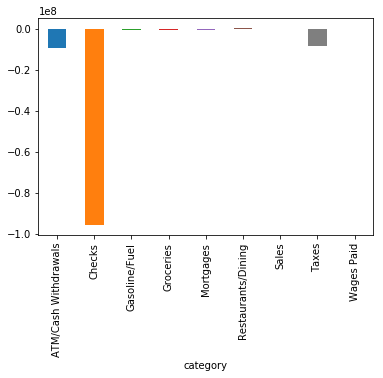

In [45]:
# plt.axis('equal')
# plt.pie(num_transac['tot_balance'].drop('Overall').values.tolist(), 
#         labels=num_transac.drop('Overall').index.values.tolist(), 
#         autopct='%1.1f%%')
num_transac.drop(['Overall'])['tot_balance'].plot.bar()

From the account balance's perspective, clearly checks make up most of the transaction amounts overall, which agrees with the second pie chart from above.
<br> However, the categories are not very well defined in my opinion. Because ATM/Cash withdraw and Checks refer to the method/channel of transactions, while other categories (except from Overall) refer to the usage. Here I assume all other categories of transactions are carried out by online transaction, so let's have a look at the distributions of the transaction channels.

In [49]:
ai['channel'] = 'Checks'
ai.loc[ai['category']=='ATM/Cash Withdrawals', 'channel'] = 'ATM'
ai.loc[ai['category']=='Overall', 'channel'] = 'Overall'
ai.loc[(ai['category']!='ATM/Cash Withdrawals') & (ai['category']!='Checks') & (ai['category']!='Overall'), 'channel'] = 'online'

num_transac = ai.groupby('channel').sum()
num_transac.columns = ['tot_balance', 'num_debits', 'num_credits']
num_transac

,tot_balance,num_debits,num_credits
channel,,,
ATM,-9288417.70,11833,748
Checks,-95772960.13,71154,171
Overall,27224421.37,277780,82950
online,-9357681.43,37423,2667


Text(0.5,1,'Amount of Balance according to Transaction Channel')

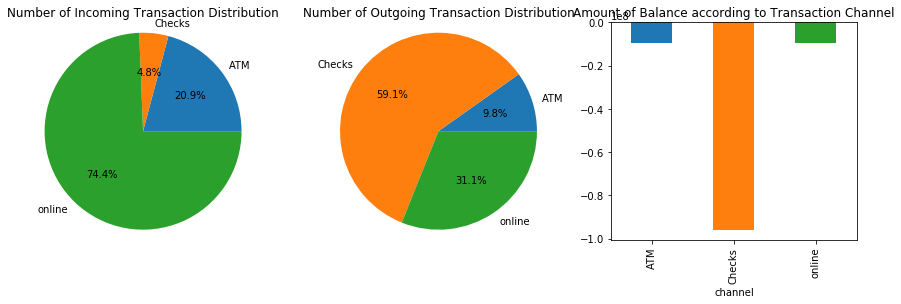

In [51]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15,4))
sizes1 = num_transac.drop('Overall')['num_credits'].values.tolist()
sizes2 = num_transac.drop('Overall')['num_debits'].values.tolist()
labels = num_transac.drop('Overall').index.values.tolist()
ax1.axis('equal')
ax1.pie(sizes1, labels=labels, autopct='%1.1f%%')
ax1.set_title('Number of Incoming Transaction Distribution')
ax2.axis('equal')
ax2.pie(sizes2, labels=labels, autopct='%1.1f%%')
ax2.set_title('Number of Outgoing Transaction Distribution')
ax3 = num_transac.drop(['Overall'])['tot_balance'].plot.bar(ax=ax3)
ax3.set_title('Amount of Balance according to Transaction Channel')

Now it's clearer that online transactions takes up 3/4 of the incoming transactions of our customers.
<br> Let's have a look at the default account distributions.

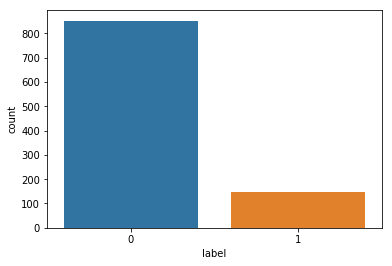

In [52]:
sns.countplot(x='label', data=al)

Only 15% of all accounts are set as default. 
<br>Let's see what category of transactions are carried out most for both types of accounts. First, pivot account_info to make sure each entry in account_id is unique. Second, merge the pivoted dafaframe and account_label. Then, plot some distributions.

In [79]:
p = ai.pivot(index='account_id', columns='category', values=['balance', 'debits', 'credits'])
p.columns = p.columns.map('_'.join)
p

,balance_ATM/Cash Withdrawals,balance_Checks,balance_Gasoline/Fuel,balance_Groceries,balance_Mortgages,balance_Overall,balance_Restaurants/Dining,balance_Sales,balance_Taxes,balance_Wages Paid,...,credits_ATM/Cash Withdrawals,credits_Checks,credits_Gasoline/Fuel,credits_Groceries,credits_Mortgages,credits_Overall,credits_Restaurants/Dining,credits_Sales,credits_Taxes,credits_Wages Paid
account_id,,,,,,,,,,,,,,,,,,,,,
Z217cWdpaXVlaWtqb2ZoY31mZWxpbXJmdWF7YWxsZ358bWdy,-1900.00,-221404.80,-980.43,-91.87,0.00,17465.59,-392.71,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0
Z217fXdkcmJld2h9aWZoaGtnZXVna2xmaGJwdm91aXp6cXd1,0.00,0.00,0.00,-27.75,0.00,10408.87,9656.20,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,0.0
Z21qaWxpamFlaHxwfGZoaH9oZW1sbHJmaWF_YWt5b3l9fWVl,-3000.00,-662028.16,0.00,0.00,0.00,74677.68,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0
Z25-bG12amVlZm96e2ZoZXtnZXZvbGpmZnZvaHBpbWpxf2lz,0.00,-131447.69,0.00,0.00,0.00,11754.29,0.00,0.0,-6206.73,0.0,...,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0
Z25qbmZzaXVld3tqb2ZoY3x1ZXZ6anBmdWRsdHt6bXBpbGdk,-53855.46,-28852.87,-643.92,-166.88,0.00,8488.51,-351.23,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0
Z25qenVycnRlZ2dqe2ZoZX9hZXV5bnBmamdydmhsfGp9cndo,-2006.75,-82782.19,-969.84,-355.80,0.00,6415.82,-1032.66,0.0,-536.02,0.0,...,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0
Z25tfXdpa2lleGd-cmZoanJ2ZXV5bHFmeWRwd2p1a2hte3hy,-1020.00,-147431.21,-44.39,-17.14,0.00,8736.27,-191.60,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0
Z25ubGlycmRleHB7e2Zoc2xzZXV9bn9mZGd7Yn1tbW9wb3V2,-1988.85,-454.56,-1441.68,-448.13,0.00,5810.57,-1015.16,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0
Z296b2l0fGRlen1ocWZoYnF0ZXZ9bnxmZnRpZm5pa2t9bGdy,-980.00,-10144.16,0.00,0.00,0.00,55770.88,0.00,0.0,-466.08,0.0,...,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0


In [57]:
am = pd.merge(p, al, on='account_id', how='inner')
am.head()

,account_id,balance_ATM/Cash Withdrawals,balance_Checks,balance_Gasoline/Fuel,balance_Groceries,balance_Mortgages,balance_Overall,balance_Restaurants/Dining,balance_Sales,balance_Taxes,...,credits_Checks,credits_Gasoline/Fuel,credits_Groceries,credits_Mortgages,credits_Overall,credits_Restaurants/Dining,credits_Sales,credits_Taxes,credits_Wages Paid,label
0,Z217cWdpaXVlaWtqb2ZoY31mZWxpbXJmdWF7YWxsZ358bWdy,-1900.00,-221404.80,-980.43,-91.87,0.0,17465.59,-392.71,0.0,0.00,...,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0
1,Z217fXdkcmJld2h9aWZoaGtnZXVna2xmaGJwdm91aXp6cXd1,0.00,0.00,0.00,-27.75,0.0,10408.87,9656.20,0.0,0.00,...,0.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,0.0,1
2,Z21qaWxpamFlaHxwfGZoaH9oZW1sbHJmaWF_YWt5b3l9fWVl,-3000.00,-662028.16,0.00,0.00,0.0,74677.68,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0
3,Z25-bG12amVlZm96e2ZoZXtnZXZvbGpmZnZvaHBpbWpxf2lz,0.00,-131447.69,0.00,0.00,0.0,11754.29,0.00,0.0,-6206.73,...,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0
4,Z25qbmZzaXVld3tqb2ZoY3x1ZXZ6anBmdWRsdHt6bXBpbGdk,-53855.46,-28852.87,-643.92,-166.88,0.0,8488.51,-351.23,0.0,0.00,...,0.0,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0,0


In [63]:
# default = am[am['label']==1]
# non_default = am[am['label']==0]
am_sum = am.groupby('label').sum().transpose()
am_sum

label,0,1
balance_ATM/Cash Withdrawals,-7295688.13,-1992729.57
balance_Checks,-85487860.61,-10285099.52
balance_Gasoline/Fuel,-500901.14,-64717.07
balance_Groceries,-392950.29,-65965.92
balance_Mortgages,-474689.70,-34808.61
balance_Overall,22927291.52,4297129.85
balance_Restaurants/Dining,881733.98,-287899.02
balance_Sales,-165378.12,0.00
balance_Taxes,-7404285.11,-796222.87
balance_Wages Paid,-51810.64,213.08


Text(0.5,1,'Proportion of Default Account for Each Category')

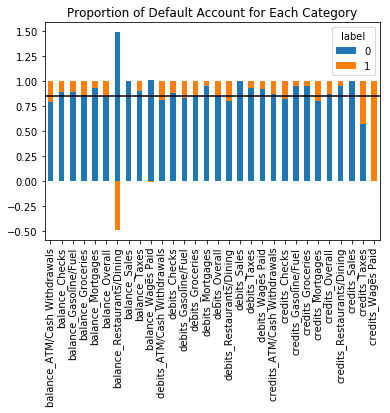

In [78]:
# plt.figure(figsize=(13,16))
am_sum.div(am_sum.sum(1).astype(float), axis=0).plot.bar(stacked=True)
plt.axhline(y=0.85, color='k', linestyle='-')
plt.title('Proportion of Default Account for Each Category')

The black line indicates the proportion of default and non-default accounts in the dataset. If blue bar crosses the line, it means there are more than average non-default account transactions for certain category; if orange bar crosses the line, it means there are more than average default account transactions for certain category. 
<br>We can observe a tendency that default accounts are more frequently used to receive wages/taxes/mortages, pay for restaurants and cash withdraws. Non-default accounta are more frequently used to receive salee/grocery/gasoline incomes, pay for wages/taxes/sales/mortages.

### Model - predict if an account is set as default

Although I am not sure what "default" account means, I assume it refers to the situation that a user has multiple bank accounts and one of them is set as default, which means he/she might make transactions mostly out of/into this account, or use its information to fill in a form from an online store. Prediction of default account has significant value to us, because we can model user behavior better from these accounts due to more frequent usage.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

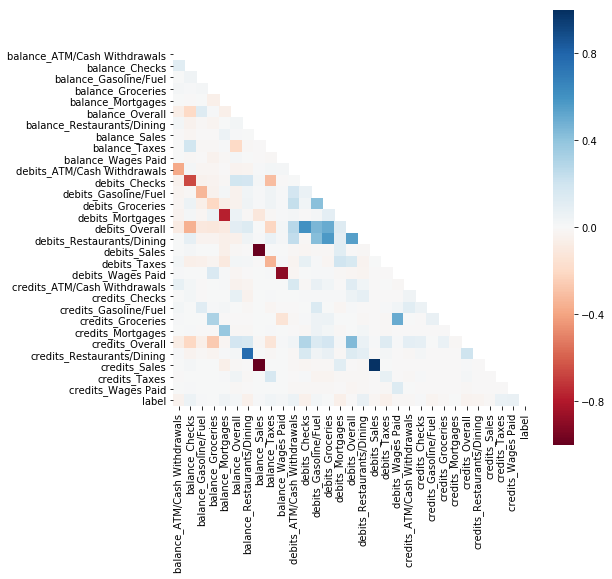

In [89]:
plt.figure(figsize=(8,8))
corr = am.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, square=True, cmap='RdBu', mask=mask)

From this correlation graph, it seems that the label (target variable) doesn't have strong correlation with any of the feature varaibles.

In [106]:
x_train, x_test, y_train, y_test = train_test_split(am.drop(['label', 'account_id'], axis=1), am['label'], test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(sum(y_train==1), sum(y_train==0))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
print(x_train_res.shape, x_test.shape, y_train_res.shape, y_test.shape)
print(sum(y_train_res==1), sum(y_train_res==0))

(800, 30) (200, 30) (800,) (200,)
128 672
(1344, 30) (200, 30) (1344,) (200,)
672 672


As observed, there is severe class imbalance problem, that is the class with label 1 has too few data points than that with label 0. Here I use SMOTE to generate more label 1 data points sythetically.

In [102]:
model = LogisticRegression()
# model = RandomForestClassifier()
print(model)
print('\ncross_val_score:', cross_val_score(model, x_train_res, y_train_res, cv=KFold(5)))

model = model.fit(x_train, y_train)
preds = model.predict(x_test)
pred_probas = model.predict_proba(x_test)
print('\naccuracy_score:', accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
print('\nroc_auc_score:', roc_auc_score(y_test, preds))

fpr, tpr, _ = roc_curve(y_test, pred_probas[:,1])
fi = pd.Series(model.coef_[0]*np.std(x_train, 0), index=am.drop(['label', 'account_id'], axis=1).columns).sort_values()
# fi = pd.Series(model.feature_importances_, index=am.drop(['label', 'account_id'], axis=1).columns).sort_values()
print('\nFeature_importances_:', fi)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

cross_val_score: [0.40892193 0.52416357 0.48327138 0.21933086 0.1380597 ]

accuracy_score: 0.895
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       180
           1       0.00      0.00      0.00        20

   micro avg       0.90      0.90      0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200


roc_auc_score: 0.49722222222222223

Feature_importances_: debits_Overall                 -9.177194e-01
credits_Overall                -5.088483e-01
balance_Restaurants/Dining     -4.929477e-01
debits_Taxes                   -3.858023e-01
balance_Overall                -3.383997e-01
balance_ATM/Cash Withdrawal

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

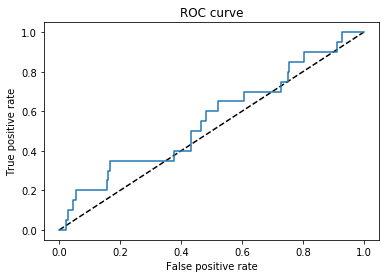

In [103]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

Text(0.5,1,'Normalized Coefficients of Logistic Regression')

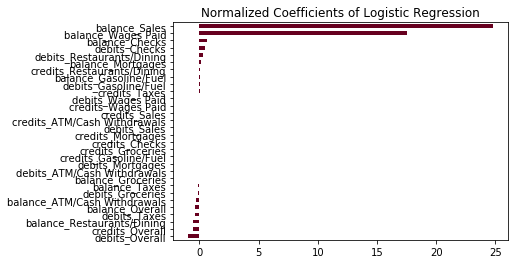

In [107]:
fi.plot.barh(cmap='RdBu')
plt.title('Normalized Coefficients of Logistic Regression')

Here I use logistic regression model because all the variables are numerical, and we can easily see the positive/negative relationship between feature variables and target variable from the normalized mode coefficients. <br>However, as hinted from the correlation graph, the predictive power of these variables are not strong enough to tell us whether an account is set as default or not: from the classification report, the precision and recall on the label 1 class from the test set are both 0, which means the model classified every data point in the test set as class 0; from the ROC curve, the model only performs slightly better than random guess.
<br> But still, from the coefficients, we can clearly observe that balance earned from sales and wages are very positively correlated to default accounts.

### Insights

- From visualization, we observed that our customer spend most frequently by checks. Except from ATM and check, people spend most on/receive money from restaurants/dining. Thus, to encourage more transactions, we could launch some related benefits, such as a higher return rate on credit card transactions for dining out or entertainment.
- With the hypothesis that most categories of transactions except from ATM/Check are carried out online, we can optimize the online transaction experience for users to make the process more automatic and easy, so that users will made more transactions on this platform.
- Only a small proportion of all accounts are set as default. By looking at the characteristics of default accounts, they are mostly used for paying and receiving wages/taxes/sales purposes.
- Although the predictive model is not sucessful, it confirms the main usage of default accounts (see last bulletpoint).
- Further, if we want to optimize the predictive model, we might want to collect more data on user behavior, such as transaction time, amount of each transaction, number of transactions on weekday/weekends/start of the month, etc.

### Reference

- [scikit-learn.org](scikit-learn.org)
- [pandas.pydata.org](pandas.pydata.org)
- [matplotlib.org](matplotlib.org)
- [seaborn.pydata.org](seaborn.pydata.org)
- [SMOTE implementation](https://www.kaggle.com/qianchao/smote-with-imbalance-data)